# Final Project : The Impact of COVID - 19

_Course:_ **02806 Social Data Analysis and Visualization** (DTU - Technical University of Denmark) <br>
Project members: **_Chao Yu (s200079), Prasad Jagtap (s200109), Nazer Hdaifeh (s192592)_**

## Table of Contents

## 1. Motivation.

For final project in Social Data Analysis & Visualization, the most open-ended specification one could possibly explore was given as a scenario to work on. Our take towards the project was something ambitious, and wanted to do something that could be easily viewable or noticable by viewers. Later, it was decided to design project around Covid-19 data because, it felt very topical being that it is the subject of the time and pretty much the only thing on all of the minds. It was imperative to offer something unique to the World that nobody seemed to be doing. Eventhough, there are lot of real-time visualization pages available already. There are rare pages talking about the _Risk & environmental factor_ or stating comparisons between the _previous outbreaks trend_. The desire to do something novel, something that would challenge us as an analyst and showcase some, out of the box ideas infront of the World which can be accessible on easily available platform without previous context.

In order to follow a structure for Part-B of the project, here is link to our Part-A video of the project: [The impact of Covid-19](https://www.youtube.com/watch?v=--AMiwuPjLI)

While the sources are on the front lines, reliably presenting people with vital information and helping them to stay informed on all things pertaining to this crisis, our goals are slightly different, as outlined below.

**Goals:**
>1. Use a potential data source to gain insights into the pandemic from unique contexts.
>2. Create an overview with the topic **_Global Impact of Covid-19_** and showcase the trend of cases, deaths & recoveries with respect to certain time period.
>3. _Risk factor & Environmental factor_ are other important things, report is focused on.
>4. Generic trend in between previous pandemic outbreaks is supposed to be illustrated comparing the `Covid-19` data to the likelyhood of **SARS**, **H1N1** & **Ebola**.

* ####  What is your dataset?

Better to talk about it once we have combined data from all of the sources.

* ####  Why did you choose this/these particular dataset(s)?

Based on the available data, could be easier to write

* ####  What was your goal for the end user's experience?

While we talked about the Goals for the website, did not had a chance to take a look at the end user's perspective.
We figured out that viewer might experience generic visualizations all over the place in the internet as there are lot of credible sources narrating the respective data story with particular genre depending upon the data availability.

The end user's guide to the report can be followed in terms of **Goals** as below:
>1. User might get a chance to use and browse an interactive website talking about the `cumulative count of cases`, `deaths` & `recoveries` on the _impact of Covid-19_.
>2. Viewer will have multiple options to select and browse the trend of a particular country out of certain countries from the menu options with choices of `daily`, `cumulative` & `increase in percentage` for `cases` & `deaths` with certain option of _time slider_.
>3. Viewer will get to know an idea about the `risk factor` & `environmental factor` in correlation to the Covid-19 situation.
>4. End user can very well review and know about the previous pandemics and its trend with respect to the Covid-19 situation with multi options viewing and comparing `Daily average deathes`, `deaths`, `death rate`, `total cases` & `Countries/regions affected`.

## 2. Basic stats. Let's understand the dataset better

* #### Write about your choices in data cleaning and preprocessing
* #### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Datasets for global impact

The dataset is prepared for plotting a geo-map and some line charts to overview the global impact. <br>
Datetime:2020-05-11

In [58]:
import pandas as pd
df = pd.read_csv('covid.txt')
df['dateRep']=pd.to_datetime(df[['year','month','day']])
df_country_cases = df.groupby(['countryterritoryCode','countriesAndTerritories'])['cases'].sum()
df_country_deaths = df.groupby(['countryterritoryCode','countriesAndTerritories'])['deaths'].sum()
country_code = [i[0] for i in df_country_cases.index]
countries = [i[1] for i in df_country_cases.index]
cases = [i for i in df_country_cases.values]
deaths = [i for i in df_country_deaths.values]
data = {'countrycode':country_code,
        'country':countries,
        'cases':cases,
        'deaths':deaths
}
new_df = pd.DataFrame(data = data)
new_df

,countrycode,country,cases,deaths
0,ABW,Aruba,101,3
1,AFG,Afghanistan,4402,120
2,AGO,Angola,45,2
3,ALB,Albania,868,31
4,AND,Andorra,755,48
...,...,...,...,...
199,XKX,Kosovo,870,28
200,YEM,Yemen,51,8
201,ZAF,South_Africa,10015,194
202,ZMB,Zambia,267,7


### Datasets for risk factor part

Because of the lack of published data concerning risk factors of Covid-19, the following data and percentage information in our dataset have been extracted from a Chinese study about  the ‘Clinical Characteristics of Coronavirus Disease 2019 in China’ : https://www.nejm.org/doi/10.1056/NEJMoa2002032. Data regarding general population and general smoking prevalence rate in chaina has been taken from data “ourworldindata” website: https://ourworldindata.org/.

In [59]:
dn = pd.read_csv('COVID19_Risk_Factors_Final.csv')
dn=dn.drop([22,23,24,25])
dn=dn.drop(columns=['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'])
dn.head()

,Risk_Factors,Total,Nonsevere,Severe,(Presence Of Primary Composite End Point) YES,(Presence Of Primary Composite End Point) NO,Total_prc,Nonsevere_prc,Severe_prc,(Presence Of Primary Composite End Point)_YES_prc,(Presence Of Primary Composite End Point)_N_prcO,population_prc,Normaly_prc
0,N,1099.0,926.0,173.0,67.0,1032.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
1,Female,459.0,386.0,73.0,22.0,437.0,41.9,41.8,42.2,32.8,42.5,47.0,517.0
2,Male,637.0,537.0,100.0,45.0,592.0,58.1,58.2,57.8,67.2,57.5,53.0,582.0
3,(NAN),3.0,3.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Never smoked,927.0,793.0,134.0,44.0,883.0,85.4,86.9,77.9,66.7,86.7,61.4,675.0


#### Covid-19 and Sex

In [60]:
sex=dn.iloc[1:4,0:4]
labels=sex['Risk_Factors']
sizes=sex['Total']
labels_gender=dn.columns[2:4]
sizes_gender=sex.iloc[0:3,2:4]
sizes_gender=sizes_gender.values.tolist()
sizes_gender=sum(sizes_gender, [])
x1=list(labels) +[(labels.iloc[i]+' '+labels_gender[j])for i in range(len(labels)) for j in range(2)]
sex

,Risk_Factors,Total,Nonsevere,Severe
1,Female,459.0,386.0,73.0
2,Male,637.0,537.0,100.0
3,(NAN),3.0,3.0,0.0


#### Covid-19 and smoking

In [61]:
Labels=dn.iloc[4:8,0:4]
labels=Labels['Risk_Factors']
sizes=Labels['Total']
labels_gender=dn.columns[2:4]
sizes_gender=Labels.iloc[0:4,2:4]
sizes_gender=sizes_gender.values.tolist()
sizes_gender=sum(sizes_gender, [])
x2=list(labels) +[(labels.iloc[i]+' '+labels_gender[j])for i in range(len(labels)) for j in range(2)]
Labels

,Risk_Factors,Total,Nonsevere,Severe
4,Never smoked,927.0,793.0,134.0
5,Former smoker,21.0,12.0,9.0
6,Current smoker,137.0,108.0,29.0
7,(NAN),14.0,13.0,1.0


#### Modelling

The datasets below is merged by several datasets to carry out a multilinear regression in the data analysis part

In [62]:
dm = pd.read_csv('deaths.csv')
dm = dm.loc[dm.Date =='May 6, 2020']
dm

,Entity,Code,Date,Total confirmed deaths due to COVID-19 (deaths)
43,Afghanistan,AFG,"May 6, 2020",95
102,Africa,NaN,"May 6, 2020",1924
158,Albania,ALB,"May 6, 2020",31
213,Algeria,DZA,"May 6, 2020",470
254,Andorra,AND,"May 6, 2020",46
...,...,...,...,...
8775,World excl. China and South Korea,NaN,"May 6, 2020",251988
8870,"World excl. China, South Korea, Japan and Sing...",NaN,"May 6, 2020",251427
8876,Yemen,YEM,"May 6, 2020",3
8910,Zambia,ZMB,"May 6, 2020",4


In [63]:
col = ['Country Code','2018']
dm_sex = pd.read_csv('sex.csv')
dm_age = pd.read_csv('age.csv')
dm_age = dm_age[col]
dm_sex = dm_sex[col]

dm = dm.join(dm_age.set_index('Country Code'),'Code')
dm.rename(columns={'2018':'age'}, inplace=True)

dm = dm.join(dm_sex.set_index('Country Code'),'Code')
dm.rename(columns={'2018':'sexratio'}, inplace=True)
dm = dm.dropna()
dm_smoke = pd.read_csv('smoker.csv')
col = ['totalSmokingRate','name']
dm_smoke = dm_smoke[col]
dm = dm.join(dm_smoke.set_index('name'),'Entity').dropna()
dm

,Entity,Code,Date,Total confirmed deaths due to COVID-19 (deaths),age,sexratio,totalSmokingRate
158,Albania,ALB,"May 6, 2020",31,13.744736,1.085,29.40
377,Argentina,ARG,"May 6, 2020",264,11.117789,1.040,23.95
418,Armenia,ARM,"May 6, 2020",40,11.253818,1.109,26.90
718,Australia,AUS,"May 6, 2020",96,15.656475,1.055,14.90
773,Austria,AUT,"May 6, 2020",606,19.001566,1.055,35.15
...,...,...,...,...,...,...,...
8202,United States,USA,"May 6, 2020",71078,15.807654,1.047,17.25
8388,Uruguay,URY,"May 6, 2020",17,14.814520,1.050,23.05
8427,Uzbekistan,UZB,"May 6, 2020",10,4.419138,1.062,13.10
8910,Zambia,ZMB,"May 6, 2020",4,2.099678,1.031,15.55


### Datasets for environmental factor part

In [64]:
df = pd.read_csv('temperature.csv')
df.head()

,Unnamed: 0,id,province,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,Kabul,65.0,8.7,-1.0,8.0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,Kabul,59.0,8.7,-3.0,8.0
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,Kabul,71.0,7.1,0.0,7.0
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,Kabul,79.0,8.7,0.0,7.0
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,Kabul,64.0,8.7,-1.0,8.0


For this  datasets, the data range is from 2020-03-15/2020-3-21. The features that we used are 'country','cases','humidity','sunHour','te mpC','windspeedKmph'

In [65]:
df_population = pd.read_csv('population.csv')
df_population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


For the population dataset, the feature 'Density(P/Km²)' were used later.

*Next step*
* Firstly, we made a function to combine these two datasets.
* Secondly, four new datasets were made based on the features and date for later use.
* These data sets are used to find the relations between caserates and temperature /humdity.

In [66]:
## two datasets:temperature,population

## comibine two datasets into a new dataframe
def get_dataframe(time,df,col):
    df_time =  df.loc[df.date == time]
    weather = df_time.groupby('country')[col].mean().values
    country = df_time.groupby('country')[col].mean().index
    lat = df_time.groupby(['country','capital'])['lat'].mean().values
    cases = df_time.groupby(['country'])['cases'].sum().values
    data = {str(col):weather,
            'country':country,
            'lat':lat,
            'cases':cases
    }
    df_time = pd.DataFrame(data=data)
    df_time = df_time.copy()
    df_time['lat'] = df_time['lat'].round().astype(int)
    data ={'country':df_population['Country (or dependency)'],
      'population':df_population['Population (2020)'],
          'Density':df_population['Density (P/Km²)']}
    df_pop = pd.DataFrame(data=data)
    df_temp_pop = df_time.set_index('country').join(df_pop.set_index('country'))
    df_temp_pop['caserate'] = df_temp_pop.cases.values/df_temp_pop.population.values
    return df_temp_pop


#newdatasets about temperature,humidity for 2020-03-15 and 2020-03-21
df_temp_315  = get_dataframe('2020-03-15',df,'tempC')
df_temp_321  = get_dataframe('2020-03-21',df,'tempC')
df_humdity_315 = get_dataframe('2020-03-15',df,'humidity')
df_humdity_321 = get_dataframe('2020-03-21',df,'humidity')
df_temp_321

,tempC,lat,cases,population,Density,caserate
country,,,,,,
Afghanistan,15.0,33,24.0,38742911.0,60.0,6.194682e-07
Albania,19.0,41,76.0,2878420.0,105.0,2.640337e-05
Algeria,17.0,28,139.0,43685618.0,18.0,3.181825e-06
Andorra,10.0,43,88.0,77240.0,164.0,1.139306e-03
Argentina,32.0,-38,158.0,45111229.0,17.0,3.502454e-06
...,...,...,...,...,...,...
Uruguay,28.0,-33,110.0,3471314.0,20.0,3.168829e-05
Uzbekistan,18.0,41,43.0,33368859.0,79.0,1.288627e-06
Venezuela,25.0,6,70.0,28451828.0,32.0,2.460299e-06


In order to assess the realtions between environment factors and the cases, we merged several datasets into a complete dataset to conduct a multi-linear regression later. The new dataset inculdes temperature,windspeed,humdity,sunhour,latitude and population density. 

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

## environmental factor

df_321_temp  = get_dataframe('2020-03-21',df,'tempC')
df_321_humdity = get_dataframe('2020-03-21',df,'humidity')
df_321_wind = get_dataframe('2020-03-21',df,'windspeedKmph')
df_321_sunhour = get_dataframe('2020-03-21',df,'sunHour')
df_321_temp = df_321_temp.dropna()
df_321_humdity = df_321_humdity.dropna()
df_321_wind = df_321_wind.dropna()
df_321_sunhour = df_321_sunhour.dropna()

df_321_temp  = get_dataframe('2020-03-21',df,'tempC')
df_321_humdity = get_dataframe('2020-03-21',df,'humidity')
col = 'humidity'
df_humidty = df_321_humdity[col]
df_wind = df_321_wind['windspeedKmph']
df_sunhour = df_321_sunhour['sunHour']
df_weather = df_321_temp.join(df_humidty)
df_weather = df_weather.join(df_wind)
df_weather = df_weather.join(df_sunhour)
# df_weather['caserate'] = df_weather['caserate'] *100000
df_weather = df_weather.dropna()
df_weather['lat'] = df_weather['lat'].abs()
df_weather.head()

,tempC,lat,cases,population,Density,caserate,humidity,windspeedKmph,sunHour
country,,,,,,,,,
Afghanistan,15.0,33,24.0,38742911.0,60.0,6.194682e-07,61.0,5.0,9.2
Albania,19.0,41,76.0,2878420.0,105.0,2.640337e-05,63.0,5.0,11.6
Algeria,17.0,28,139.0,43685618.0,18.0,3.181825e-06,80.0,11.0,7.6
Andorra,10.0,43,88.0,77240.0,164.0,1.139306e-03,68.0,5.0,11.6
Argentina,32.0,38,158.0,45111229.0,17.0,3.502454e-06,36.0,7.0,11.6


Using this dataset, we can know how the cases distributed by latitude, how the temperature varis by the latitude and how the population density changes by the latitude, which will be shown in the Data Analysis part.

### Dataset for outbreak comparison

This dataset is used to compare different diseases to find more features of the covid-19.

In [68]:
df_outbreak_comparison = pd.read_csv('ourbreak.txt')
df_outbreak_comparison

,diseases,averagedeath,deaths,deathsrate,cases,countries
0,COVID-19,1740.0,207094,1.40,3069757,186
1,H1N1,743.0,362000,0.05,60800000,214
2,SARS,3.2,774,9.60,8096,26
3,Ebola,5.3,13023,50.00,28646,10


## 3. Data Analysis

* #### Describe your data analysis and explain what you've learned about the dataset.
* #### If relevant, talk about your machine-learning.

### Overview global impact

In [69]:
import plotly.graph_objects as go
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly


choropleth_deaths = dict(
        type = 'choropleth',
       locations = new_df['countrycode'],
        z = new_df['deaths'],
        text = new_df['country'],
        colorscale = 'Oranges',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = 'Deaths',
)


choropleth_cases = dict(
        type = 'choropleth',
        locations = new_df['countrycode'],
        z = new_df['cases'],
        text = new_df['country'],
        colorscale = 'Reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = 'Cases',
)



data = [choropleth_deaths,choropleth_cases]


updatemenus=[
        dict(active = 0,
            buttons=list([
            dict(label="Cases",
                 method="update",
                 args=[{"visible": [False, True]},
                           {"title": "Cases",
                            }]),
            
            dict(label="Deaths",
                 method="update",
                 args=[{"visible": [True,False]},
                           {"title": "Deaths",
                            }]),
        ]),
        )
    ]


layout = dict(title='Impact of Covid-19 across the Globe', showlegend=True,
                  updatemenus=updatemenus,
        geo = dict(showframe = True,
                   showcoastlines = False,
                   showland = True,
                   landcolor = '#c1bfbf', 
                   projection = dict(type = 'equirectangular')),
              
        annotations = [dict(
                   x=0.5, 
                   y=0.15, 
                   xref='paper',
                   yref='paper',
                   text='Source:<a href="https://covid19.who.int/">\
                         WHO | World health Organization</a>',
                   showarrow = False
        )]
    )   


figure = dict(data=data, layout=layout)

plotly.offline.iplot(figure, validate=True)

combine with dash

In [70]:
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=figure)
])


app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 673-331-249
Debugger PIN: 673-331-249
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


For the Epidemic trend, I programmed with R and Shiny. 

In [71]:
from IPython.display import IFrame

IFrame(src='https://oliverchao.shinyapps.io/pandemic-trend/', width=1000, height=500)

The global pandemic outbreak started at the late Feburary. After two months fight, many countries are going to bend the curves(total cases and mortatilty),which means the daily new cases decrease with time. While in the global aspect, the figures still show an up-rising trend. Among the countries, China and Korea has decreased the daily cases to a low level. The daily new cases in USA still remain high. Based on the information, the pandemic is yet to finish. Countries and Regions still have to take measures to defend.

### Risk factor part
> Since December 2019, when coronavirus disease 2019 (Covid-19) arise in Wuhan city and rapidly spread throughout the world, data have been needed in order to examin the possible risk factors of the affected patients.The risk factors are the factors which may increase the possibility of death or suffering from severe symptoms when exist within infected people  was being one of the main concern of all people, researchers and specialists   all around the world during the pandemic breakdown.
 
 
 **The aim of this part** is to examine the impact of Covid-19 on people according to *age, sex, smoking and some other health disease*. This will be done using the data regarding 1099 patients with confirmed Covid-19 cases from 552 hospitals in 30 provinces, autonomous regions, and municipalities in mainland China through January 29, 2020.The largest number of patients (132) had been admitted to Wuhan Jinyintan Hospital.

#### Covid-19 and Sex

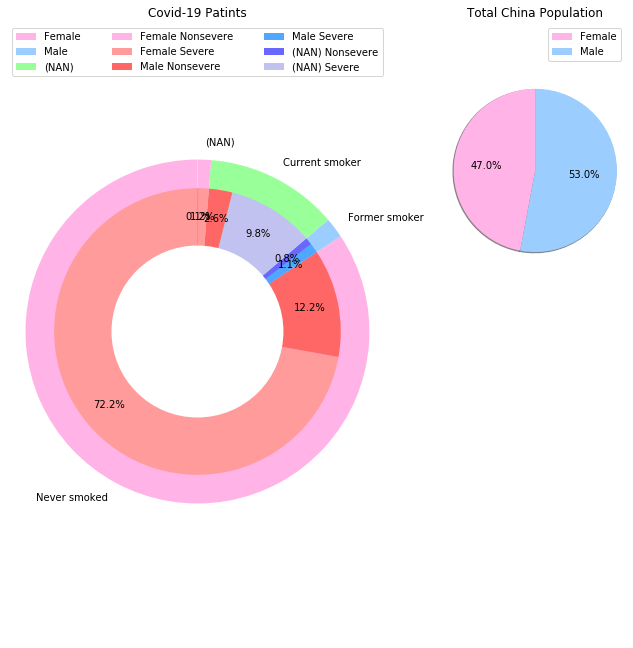

In [72]:
# Data to plot
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

colors = ['#ffb3e6', '#9bcdff', '#99ff99']
colors_gender = ['#ff9b9b','#ff6666' ,'#4fa7ff','#6868ff', '#c2c2f0','#ff6666']

#Plot
plt.figure(figsize=(15,25)) 
ax1=plt.subplot(221,title="Covid-19 Patints")

ax1.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,radius=3)

# ax1.pie(sizes_gender ,labeldistance=1,autopct='%1.1f%%', pctdistance=0.8,colors=colors_gender,startangle=90,
#         radius=2.5)


ax1.pie(sizes_gender ,labeldistance=1,autopct=lambda p: '{:1.1f}%'.format(p) if p > 0 else '', pctdistance=0.8,
        colors=colors_gender,startangle=90,
        radius=2.5)

#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.legend(x1,loc='upper right', ncol=3, mode="expand")
ax1.axis('equal')


#fig1, ax1 = plt.subplots()
ax2=plt.subplot(443,title='Total China Population' )

ax2.pie(dn.iloc[1:3,12:],colors=['#ffb3e6', '#9bcdff'],radius=2, autopct='%1.1f%%', shadow=True, startangle=90,)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal',)  
ax2.legend(dn.iloc[1:3,0])
# plt.tight_layout()
plt.show()



As we can see in the above visualization, while  47% of Chinese people as female, they form only about  41.7% of the total people who infected by covid-19. This means that **femal are less likely to get infected by CoronaVirus**. Also the percentage of female who suffering from severe symptoms of the disease are remarkably less than the corresponding males by about 20% of the total cases.  this means that **males are more likly to have a severe deterioration** of the disease.  

#### Covid-19 and smoking

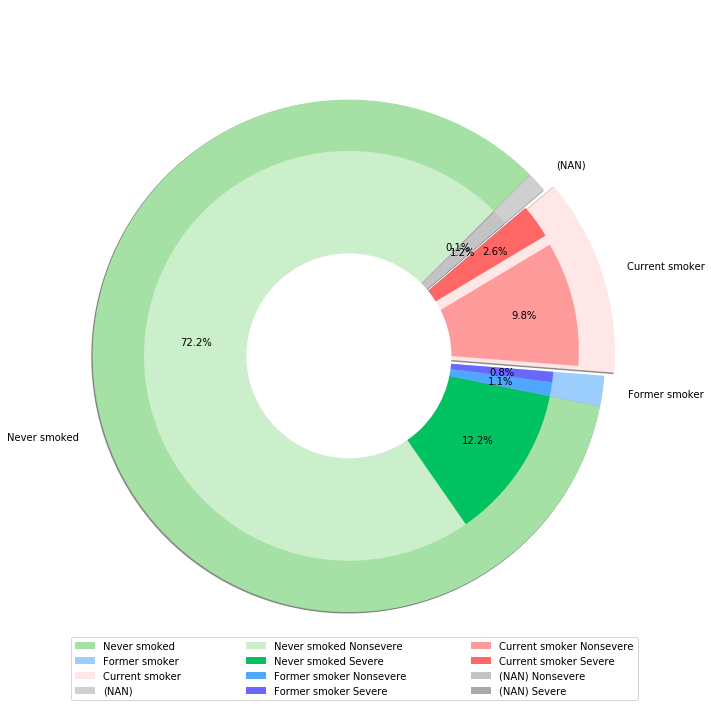

In [73]:
colors = ['#a5e1a5' , '#9bcdff' ,'#ffe7e7','#cfcfcf']
colors_gender = ['#cbeecb','#00c261','#4fa7ff','#6868ff', '#ff9a9a','#ff6666','#c3c3c3','#a9a9a9']
explode=(0,0,0.2,0)
explode_gender=(0,0,0,0,0.5,0.5,0,0)
#Plot
plt.figure(figsize=(10,10)) 
plt.pie(sizes, labels=labels, colors=colors, startangle=45, frame=True,radius=5,shadow=True,explode=explode)
plt.pie(sizes_gender, autopct='%1.1f%%',pctdistance=0.75, colors=colors_gender,startangle=45,
        radius=4 ,shadow=True,explode=explode_gender) #autopct='%1.1f%%',pctdistance=0.7 instead we can use labels,labeldistance
#Draw circle
centre_circle = plt.Circle((0,0),2,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x2,loc='lower right', ncol=3, mode="expand")

plt.axis('equal')
plt.tight_layout()
plt.show()

The total percent of smoker people in china is 26%, but we can notice from the above visualization that only 11% of the people infected with Covid-19 are active smoker, this can tell us that **smoker people are less likely to get infected by Covid19**. However, it seems that about 30% of smokers who have Covid-19 are facing severe symptoms compared to only 12% from the non smoker patints. This means that **smokers are more likely to have a deterioration if they get infected by the Virous**.

#### machine learning
* To seek any statistical findings among these variables, we suppose that there is a multi-linear realtionship between the death rate(deaths per million) and sex ratio,age and smokingrate of the countries. Several datasets were merged to conduct a multi-linear regression.

In [74]:
from regressors import stats
column = ['age','sexratio','totalSmokingRate']
x = dm[column]
x = preprocessing.scale(x)
y = dm['Total confirmed deaths due to COVID-19 (deaths)']
linear_regression = LinearRegression()
reg = linear_regression.fit(x,y)
reg.coef_

array([ 2881.26106276,  -352.99632697, -1376.48555863])

In [75]:
stats.coef_pval(reg, x, y)

array([0.00332677, 0.00132188, 0.6671258 , 0.11605922])

* The coeffiecents suggest that sexratio and somking rates are inversely correlated with the deaths, whereas age is strongly postively correlated.
* The p-value shows that only the age variable is statistically significant, which means it do influence the output value:death rate. It can conclude that the country with a large proportion of elderly population has greater risk to have a high death rate.

### Environmental part
>The main environmental factors which have been shown to affect the spread of Covid-19 are temperature [(Michael Triplett,2020)](https://www.medrxiv.org/content/10.1101/2020.04.02.20051524v2), humidity, and air pollution [(Rachel C. Nethery,2020)](https://projects.iq.harvard.edu/covid-pm). It has also been suggested that factors like population density, latitude, number of sunlight hours or even windspeed correlate with virus spread.

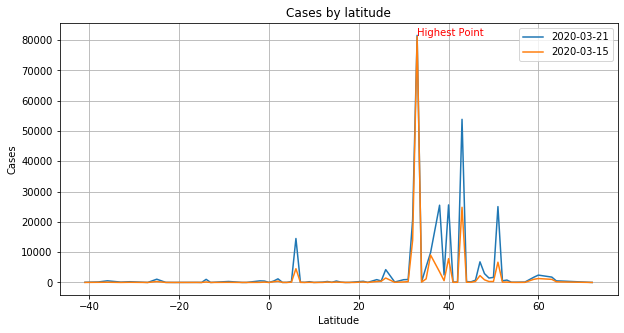

In [76]:
plt.rcParams['figure.figsize'] = [10, 5]
df_321_groupby = df_temp_321.groupby('lat')['cases'].sum()
df_315_groupby = df_temp_315.groupby('lat')['cases'].sum()
plt.plot(df_321_groupby.index,df_321_groupby.values, label = '2020-03-21')
plt.plot(df_315_groupby.index,df_315_groupby.values, label = '2020-03-15')
plt.xlabel("Latitude")
plt.ylabel(r"Cases")
plt.legend(loc="upper right")
plt.title('Cases by latitude')
plt.text(33,81543,'Highest Point',color = 'red')
plt.grid()

In this chart, the cases are mostly aggregated between 30N and 50N, where the temperature is lower. In additon, the cases increases faster in northern hemisphere than the sourthern part, where the cases go up slightly.

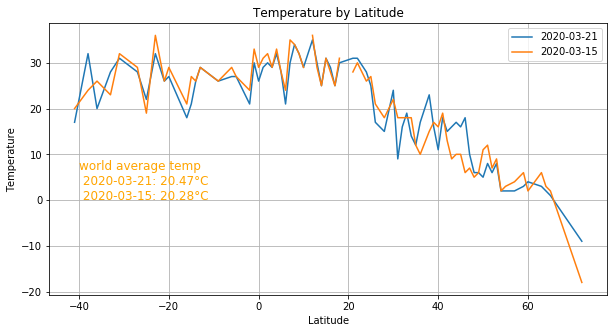

In [77]:
df_321_groupby = df_temp_321.groupby('lat')['cases'].sum()
df_315_groupby = df_temp_315.groupby('lat')['cases'].sum()

df_321_temp =df_temp_321.groupby('lat')['tempC'].mean() 
df_315_temp =df_temp_315.groupby('lat')['tempC'].mean() 
plt.plot(df_321_temp.index,df_321_temp.values.round(),label = '2020-03-21')
plt.plot(df_315_temp.index,df_315_temp.values.round(),label = '2020-03-15')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.legend(loc="upper right")
plt.title('Temperature by Latitude')
plt.text(-40, 0, 'world average temp\n 2020-03-21: 20.47°C\n 2020-03-15: 20.28°C', fontsize=12,color = 'orange')
plt.grid()

From this chart,the world average temperature increased by 0.2°C from 2020-03-15 to 2020-03-21.Meanwhile,the average temperature in the southern hemisphere decreases from 26.71 to 25.69.While ,it increases from 17.38 to 17.69 in the northern hemisphere.

According to these two charts, we could make a hypothesis that the temperature is corelated the tramission of the COVID-19

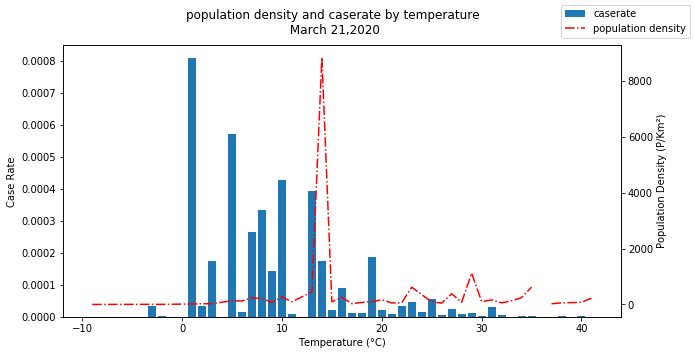

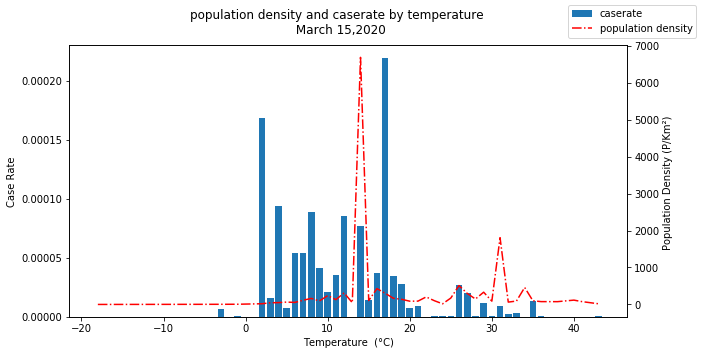

In [78]:
df_321_groupby_temcase = df_temp_321.groupby('tempC')['caserate'].mean()
df_321_groupby_tempop = df_temp_321.groupby('tempC')['Density'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df_321_groupby_temcase.index,df_321_groupby_temcase.values, label = 'caserate')

ax2 = ax.twinx()
ax2.plot(df_321_groupby_tempop.index,df_321_groupby_tempop.values, '-.r', label = 'population density')
fig.legend(loc="upper right")
fig.suptitle('population density and caserate by temperature\n March 21,2020')

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel(r"Case Rate")
ax2.set_ylabel(r"Population Density (P/Km²)")
plt.show()

df_315_groupby_temcase = df_temp_315.groupby('tempC')['caserate'].mean()
df_315_groupby_tempop = df_temp_315.groupby('tempC')['Density'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df_315_groupby_temcase.index,df_315_groupby_temcase.values, label = 'caserate')

ax2 = ax.twinx()
ax2.plot(df_315_groupby_tempop.index,df_315_groupby_tempop.values, '-.r', label = 'population density')
fig.legend(loc="upper right")
fig.suptitle('population density and caserate by temperature \n March 15,2020')

ax.set_xlabel("Temperature  (°C)")
ax.set_ylabel(r"Case Rate")
ax2.set_ylabel(r"Population Density (P/Km²) ")
plt.show()

>From these two charts, it is clear that the area whose temperature is less than 20 has high caserate. On the opisite side, the case rate remains at lower level in the warmer area(temperature >20) although some are densed-populated. What else, even though in some area with high population density, the. case rate is not extremly high compared to other areas. Regarding these two charts, we can conclude that population may not be the key factor. While temperature is correlated to the caserate.

Compared to other outbreaks, these pendemic always distributed along the area around 30-50N where the relative humidity is 47% to 79%. In additon, regarding [*Malik Peiris's research*]('https://www.hindawi.com/journals/av/2011/734690/') about SARs, the virus retained its viability at relative humidity of 40%-50%.
Therefore, we are curious about how the Covid-19 distributes by humidity.

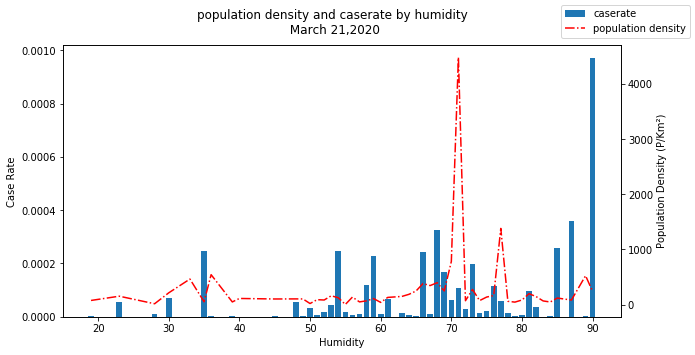

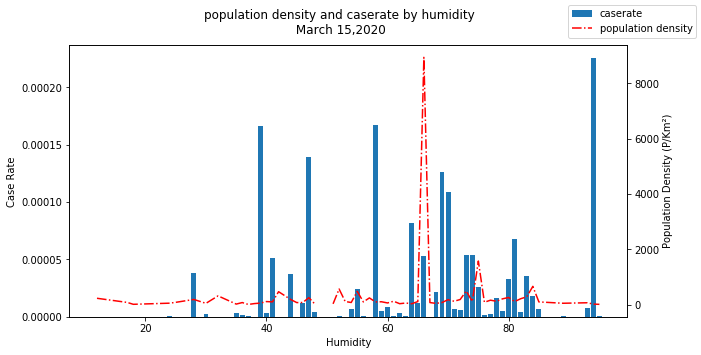

In [79]:
df_321_groupby_humicase = df_humdity_321.groupby('humidity')['caserate'].mean()
df_321_groupby_humipop = df_humdity_321.groupby('humidity')['Density'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df_321_groupby_humicase.index,df_321_groupby_humicase.values, label = 'caserate')

ax2 = ax.twinx()
ax2.plot(df_321_groupby_humipop.index,df_321_groupby_humipop.values, '-.r', label = 'population density')
fig.legend(loc="upper right")

ax.set_xlabel("Humidity")
ax.set_ylabel(r"Case Rate")
ax2.set_ylabel(r"Population Density (P/Km²)")
fig.suptitle('population density and caserate by humidity\n March 21,2020')
plt.show()

df_315_groupby_humicase = df_humdity_315.groupby('humidity')['caserate'].mean()
df_315_groupby_humipop = df_humdity_315.groupby('humidity')['Density'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df_315_groupby_humicase.index,df_315_groupby_humicase.values, label = 'caserate')

ax2 = ax.twinx()
ax2.plot(df_315_groupby_humipop.index,df_315_groupby_humipop.values, '-.r', label = 'population density')
fig.legend(loc="upper right")

ax.set_xlabel("Humidity")
ax.set_ylabel(r"Case Rate")
ax2.set_ylabel(r"Population Density (P/Km²)")
fig.suptitle('population density and caserate by humidity\n March 15,2020')
plt.show()

>It is evident to see that areas whose relative humidity is between 40 and 80 has higher caserate. While it is hard to detect any more connection between humidty and caserate

### Machine learning
>In order to support our data analysis, several datasets were merged three datasets and the values of the variates were standarized. Multilinear regression was then carried out.

* Firstly, we extracted temperature,windspeed,humdity,sunhour,latitude and population density as our input and cases as putput
* Secondly,we standarized the values to ensure they use the same scale.
* Thirdly, a multi-linear regression  were conducted and  the coeffiecents were extracted from the result.
* Finally, we concluded that sunhour and population density are not highly correlated with the case rate, whereas temperature, windspeed, humidity and Abs(latitude) are strongly inversely correlated to support our analysis above.

In [80]:
from regressors import stats
y = df_weather['cases']
column = ['tempC','humidity','windspeedKmph','sunHour','lat','Density']
x = df_weather[column]
x = preprocessing.scale(x)
linear_regression = LinearRegression()
reg = linear_regression.fit(x,y)
reg.coef_

array([-3180.79815382, -3064.03985494,  -676.8529543 ,  -266.34521805,
       -2013.51269032,   -59.96176325])

In [81]:
stats.coef_pval(reg, x, y)

array([8.80328040e-03, 1.47231218e-02, 3.63458215e-04, 3.53680559e-01,
       7.40914295e-01, 1.08114333e-01, 9.32694218e-01])

* The coeffiecents suggest that sunhour and population density are not highly correlated with the case rate, whereas temperature, windspeed, humidity and Abs(latitude) are strongly inversely correlated. 
* According to the p-value, it tells that temperature and humidity are statistically significant while the rest features are not. 
* Therefore, the statistic evidence shows that temperature and humidity can affect the case level.However, the other variables have no influence.

### Outbreak comparsion

For this part, I also programmed with R and shiny

In [82]:
from IPython.display import IFrame

IFrame(src='https://oliverchao.shinyapps.io/shinytwo/', width=1000, height=500)

* Covid-19 is less deadly than either SARS or Ebola but higher than H1N1.
* Coronavirus has spread much more widely than SARS or Ebola. 186 countries/regions are influenced by coronavirus。
* Compared to H1N1，Covid-19 is less influenced than it by now. However, considering its current trend (which mentioned in part 2), it is possible that coronavirus will continue expand to more places.

## 4. Genre. Which genre of data story did you use?

Storytelling strategies vary among genre. Genre vary primarily in terms of; 
>* The distinct visual scenes, multiplexed in time and/or space that the number of frames contains. 
>* The order of visual elements.

Genres are not mutually exclusive, they can function combining to produce more complex visual genres. different genres work better for different story types. Choosing the appropriate genre depends on a variety of factors, including the complexity of the data, the complexity of the story, the intended audience, and the intended medium.

The genre of data story identified in the report is `Annotated Graph/Map` within the `Slide Show` format.
There are other genre the report has been able to cover along with the help of precised data. The data story is initiated from the annotated pattern covering the slide in frames divided in certain time period as shown in the website.  

* #### Which tools did you use from each of the 3 categories of _Visual Narrative_ (Figure 7 in Segal and Heer). Why?

One of the design space dimensions is _Visual Narrative_ tactics. There is always some inevitable subjectivity when
imposing a taxonomy over a diverse set of designs. While working on the report, _Visual Structuring_ & _Highlighting_ tools seems to be leveraged out of the categories of Visual Narrative tactics. 

> _Visual structuring_ refers to mechanisms that communicate the overall structure of the narrative to the viewer and allow him to identify his position within the larger organization of the visualization. 

Since the outcome of the narrative is oriented with respect to viewer, _Visual structuring_ design strategy helps viewer visualize the `consistent visual platform` and allow them to track progress through the visualization using `timeline slider` as in the World Map from website showing distinct characteristics at different timeline.  

> _Highlighting_ refers to visual mechanisms that help direct the viewer’s attention to particular elements in the display.

_Highlighting_ in the report is achieved through the `use of color`, `framing` & `sizing`, which augment the salience of an element relative to its surroundings.

Following the round-about structure of the visual narrative, the viewer might be able to model the visualization to conceive the details-on-demand and acknowledge the patterns to view the information using the timeline slider as can be done in the map from the website.

* #### Which tools did you use from each of the 3 categories of _Narrative Structure_ (Figure 7 in Segal and Heer). Why?

Another design space dimension is _Narrative Structure_ tactics, used by visualization, or non-visual mechanisms facilitates the narrative. This division is classified in three sections out of which _interactivity_ & _messaging_ genre constitutes the report in terms of the tools used. 

> _Interactivity_ refers to the different ways a user can manipulate the visualization like `filtering`, `selecting`, `searching`, `navigating` and also how the user learns the methods such as explicit instruction, tacit tutorial, initial configuration.

_Interactivity_ is achieved in the report based on the custom options the viewer can leverage while visualizing any particular graph or a chart. For instance, it would be helpful for viewer to use a dropdown menu or a radio button specifying the cases/  deaths or recoveries with the help of time bar in order to check the status per country with respect to time period as illustrated in the website. 

> _Messaging_ refers to the ways a visualization communicates observations and commentary to the viewer. This might be achieved
through short text fields such as `labels`, `captions`, `headlines`, `annotations` or more substantial descriptions like articles, introductions, summaries.

_Messaging_ is another important tool when it comes to the _Narrative Structure_. The viewer is able to visualize and fetch relevant data from the labels and annotations while hovering certain plots. Brief introductions and summaries are although size consuming and tend to be lesser interactive but it contains viable information supporting and referring the plots. 

## 5. Visualizations.

_Visualization_ is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum [Wiki](https://en.wikipedia.org/wiki/Data_visualization) 

* #### Explain the visualizations you've chosen.

   1. The global Impact of Covid-19 (choropleth map)
>* The global impact of Covid-19 is a world map in form of annotated genre, visualized in order to let viewer interpret and come across the count of `Cases`, `deaths` & `recoveries` with respect to all the countries around the Globe.
>* The menu is briefly classified in 3 types; `confirmed cases`, `confirmed deaths` & `confirmed recoveries`.
>* Each multi menu option like Cases, deaths & recoveries are featured in different set of colors such as `Blues`, `Reds` &` Greens` respectively.
>* The classified menu is selected in terms of dropdown in the notebook and can be selected in terms of radio buttons while referring website.
>* The attributes of the choropleth map from the notebook & website version has count stored accordingly with the country code and country plotted in a Geo-map and could be easily browsed once hovering the cursor. 
>* Another add-on pulled over in a website version of map employees the timeline slider in order to select and view the country data with respect to the time period.

   2. Epidemic trend (Line Graph)
>* Another version of data for cases & deaths with respect to specified countries is shown in the menu option of the website.
>* The line graph is constructed in order to precisely review the pattern of the cases and deaths in the countries with respect to its timeline.
>* The radio buttons are provided to feature a line chart with respect to `daily`, `cumulative` or `increase in percentage`.
>* A timebar is provided for browsing the data pattern of cases or deaths in particular time period for a selected country.
>* Cases are illustrated in reds where deaths are drawn in silver color for marking epidemic trend. 

   3. Outbreaks Comparisons (Bar Graph)
>* The Bar chart is depicted comparing the trend previous major pandemics followed. The graph shows a toggle/radio buttons feature to jump upon `Death rate`, `Deaths`, `Cases` & `cumulative count of the countries affected`.  
>* Each menu option illustrates a feature plot for _Diseases vs Amount_. The focused diseases are **SARS, H1N1, Ebola** and **Covid-19**.
>* The visualization style for the bar graph is a basic annotated chart with count depicted for the diseases and brief comparison between the trend of the pandemic then and now.
   

* #### Why are they right for the story you want to tell?

The motivation of the report revolves around the specifics of the Covid-19. The Global Impact is huge and has made a  tremendous difference across the World. The value, report is trying to create is by sharing the important aspect of showcasing the current and latest Global Impact .

>* **The global impact of Covid-19** is used to visualize the count of Confirmed Cases, confirmed deaths & confirmed recoveries for distinct countries across the World.
>* **Epidemic trend** is useful in terms to precisely rectify the hidden pattern, count of cases, deaths or deaths rate could return with respect to daily,cumulative and increase in percentage behaviour.
>* **Outbreak comparison** is an essential tool being part of the report which can be used to analyse and depict the trend of the pandemics in past. Analysis from the website data such as  - _Covid-19 is less deadly than either SARS or Ebola but higher than H1N1_ can be formulated from the bar graph with existing data.  



## 6. Discussion. Think critically about your creation

* #### What went well?

 >* We overviewed the **_global impact of covid-19_** through our `anotated style` within `slide show` visulization.
 >* Based on our dataset, we analyzed how the _environmental factors affect the spread of the Covid-19, followed by a multilinear regression_. The statistic evidence tells that **temperature and humidity play an important role in the model**.
 >* The preliminary comparisons in form of outbreaks comparison among diseases was carried out to find more features of coronavirus model with respect to the previous trend of pandemics such as **SARS, H1N1 & Ebola**.

* #### What is still missing? What could be improved?, Why?

Due to the limit of dataset availabity, some analysis were made based on small datasets, which could affect the result partially. To narrow down the bias of the analysis, many citations were used to prove our opionions.

Further study might include below terms:
>* A **logistic regression** can be made to figure out the probability of a man getting infected based on his `sex`,`age`,`medical history` or `living habits`. However, this study need a _plenty of data_ and advanced _machine learning_ methods.

>* As for the environmental factor, a further study can be carried out to find out under which circumstance the virus is the least active.

## 7. Contributions. Who did what?

* #### You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
* #### It is not OK simply to write "All group members contributed equally".

|Name|Project Distribution|
|--|-------------------------------|
|Chao Yu (s200079) |pandemic trend chart,webpage setup,environmental factor part, outbreak comprasion,explainer notebook(2,3)|
|Prasad Jagtap (s200109) |geomap plot,explainer notebook(1,4,5,6),explainer notebook organization|
| Nazer Hdaifeh (s192592)|risk factor part,explainer notebook(2,3)|